<a href="https://colab.research.google.com/github/ShinJooah/AI4.0/blob/main/%EA%B0%9C%EA%B3%A0%EC%96%91%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-08-02 05:50:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   252MB/s    in 0.3s    

2022-08-02 05:50:34 (252 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.922.jpg', 'cat.545.jpg', 'cat.664.jpg', 'cat.326.jpg', 'cat.493.jpg']
['dog.477.jpg', 'dog.565.jpg', 'dog.966.jpg', 'dog.247.jpg', 'dog.906.jpg']


In [ ]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


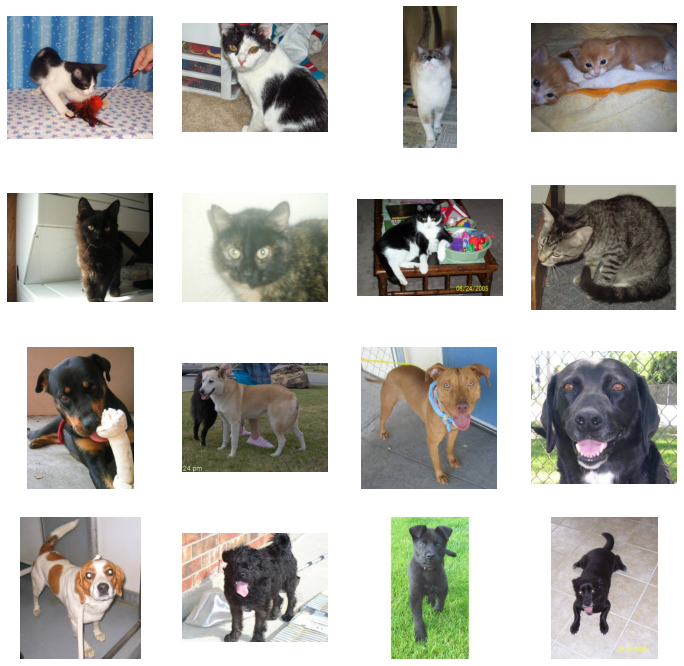

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
next_cat_pix

['/tmp/cats_and_dogs_filtered/train/cats/cat.922.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.545.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.664.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.326.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.493.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.863.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.799.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.35.jpg']

In [ ]:
next_dog_pix

['/tmp/cats_and_dogs_filtered/train/dogs/dog.477.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.565.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.966.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.247.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.906.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.38.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.506.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.175.jpg']

In [ ]:
len(train_cat_fnames)

1000

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_steps=50,
                    verbose=2)

Epoch 1/20
100/100 - 9s - loss: 1.3822e-05 - accuracy: 1.0000 - val_loss: 6.1428 - val_accuracy: 0.7030 - 9s/epoch - 92ms/step
Epoch 2/20
100/100 - 8s - loss: 0.0082 - accuracy: 0.9980 - val_loss: 6.0278 - val_accuracy: 0.6950 - 8s/epoch - 83ms/step
Epoch 3/20
100/100 - 8s - loss: 0.0139 - accuracy: 0.9975 - val_loss: 5.7981 - val_accuracy: 0.6970 - 8s/epoch - 83ms/step
Epoch 4/20
100/100 - 8s - loss: 0.0068 - accuracy: 0.9975 - val_loss: 5.2677 - val_accuracy: 0.6870 - 8s/epoch - 83ms/step
Epoch 5/20
100/100 - 8s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 5.3900 - val_accuracy: 0.6840 - 8s/epoch - 84ms/step
Epoch 6/20
100/100 - 8s - loss: 3.9867e-05 - accuracy: 1.0000 - val_loss: 5.7889 - val_accuracy: 0.7030 - 8s/epoch - 83ms/step
Epoch 7/20
100/100 - 8s - loss: 3.6724e-09 - accuracy: 1.0000 - val_loss: 5.8154 - val_accuracy: 0.7070 - 8s/epoch - 83ms/step
Epoch 8/20
100/100 - 8s - loss: 0.0043 - accuracy: 0.9980 - val_loss: 5.8415 - val_accuracy: 0.7010 - 8s/epoch - 83ms/step
Epoc

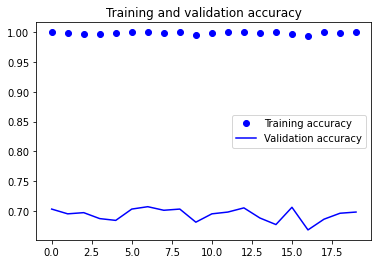

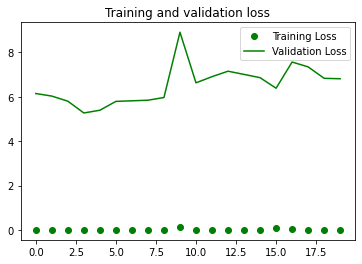

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving bird.jpg to bird.jpg
[1.]
bird.jpg is a dog
